In [1]:
import numpy as np
from numpy import asarray
from numpy import savetxt
import matplotlib.pyplot as plt

def rk4_step(y0, x0, f, h, f_args = {}):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0, x0, **f_args)
    k2 = h * f(y0 + k1/2., x0 + h/2., **f_args)
    k3 = h * f(y0 + k2/2., x0 + h/2., **f_args)
    k4 = h * f(y0 + k3, x0 + h, **f_args)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)

def rk4(y0, x0, f, h, n, f_args = {}):
    ''' Simple implementation of RK4
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            n      - number of steps
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yn - N+1 x M numpy array with the results of the integration for every time step (includes y0)
            xn - N+1 x 1 numpy array with the time step value (includes start x0)
    '''
    yn = np.zeros((n+1, y0.shape[0]))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = x0
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], x0 = xn[n-1], f = f, h = h, f_args = f_args)
        
    return(yn, xn)

# Be advised that the integration can take a while for large values of n (e.g >=10^5).

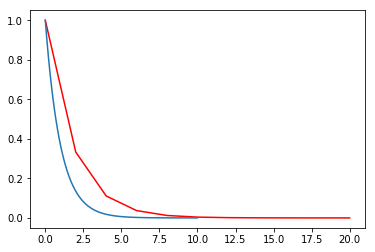

In [2]:
# Präsenzaufgabe, in der Definition steht die DGL 

def der(y,t):
    return (-1)*y

# hier sind unsere Startwerte
x0=np.array([0]);
y0=np.array([1]);

# hier führen wir die vordefinierte RK4 integration durch und speichern ort und Zeit
ort, zeit = rk4(y0,x0,der,2,10)
plt.plot(zeit,ort[:,0],'r')
x = np.linspace(0,10,100,'o')
plt.plot(x,np.exp(-x))
# plt.yscale('log')


# Homework 2 a)

In [3]:
# beginn der Hausaufgabe
# function that calculates the derivates of all variables of the ODE
def abl(r,t,m1,m2,m3):
    ''' Definition der Ableitungsfunktion 
        Inputs:
            r    - 12 x 1 numpy array specifying all variables of the ODE at the current time step
            t    - current time step
            m1   - mass of the first body
            m2   - mass of the second body
            m3   - mass of the third body
        Output:
            res  - 12 x 1 numpy array specifying all drivatives of the variables of the ODE at the current time step
    '''
    
    # Read out r
    r1 = r[:2];
    v1 = r[2:4];
    r2 = r[4:6];
    v2 = r[6:8];
    r3 = r[8:10];
    v3 = r[10:];
    
    # calculate distances
    r12=np.linalg.norm(r2-r1)
    r13=np.linalg.norm(r3-r1)
    r23=np.linalg.norm(r3-r2)
    
    # calculate acceleration
    a1 = G *( m2 * (r2-r1)/(r12**3) + m3 * (r3-r1)/(r13**3))
    a2 = G *( m1 * (r1-r2)/(r12**3) + m3 * (r3-r2)/(r23**3))
    a3 = G *( m1 * (r1-r3)/(r13**3) + m2 * (r2-r3)/(r23**3))
    
    # write everything into on numpy array, the dervatives of the locations r1 to r3 are v1 to v3
    li=np.concatenate((v1,a1))
    la=np.concatenate((v2,a2))
    lo=np.concatenate((v3,a3))
    res =np.concatenate((li,la,lo))
    return res

In [4]:
# Defintion der Startwerte aus dem Skript
r1 = np.array([-0.97000436,0.24308753])
r2 = np.array([0.97000436,-0.24308753])
r3 = np.array([0,0])
v1 = np.array([-0.46620368,-0.43236573])
v2 = np.array([-0.46620368,-0.43236573])
v3 = np.array([0.93240737,0.86473146])

# Setze alle massen auf 1
m ={'m1':1,'m2':1,'m3':1}

# führe alle start Daten der ODE in das 12 x 1 numpy array r
ra = np.concatenate((r1,v1))
rb = np.concatenate((r2,v2))
rc = np.concatenate((r3,v3))
r = np.concatenate((ra,rb,rc))

#startzeit ist 0
t =0

# stepsize ist 0.01
h = 0.01

# wir wollen 150 schritte gehen
n=200
G = 1

# Lösen der ODE mit den Startwertden. Abspeichern von Variablen in rn zu den Zeiten tn
rn,tn = rk4(r,t,abl,h,n,m)


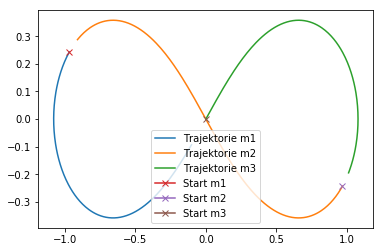

In [5]:
#plotten des Ergebnisses. 
plt.plot(rn[:,0],rn[:,1], label='Trajektorie m1')
plt.plot(rn[:,4],rn[:,5], label='Trajektorie m2')
plt.plot(rn[:,8],rn[:,9], label='Trajektorie m3')
plt.plot(rn[0,0], rn[0, 1], marker="x", label="Start m1")
plt.plot(rn[0,4], rn[0, 5], marker="x", label="Start m2")
plt.plot(rn[0,8], rn[0, 9], marker="x", label="Start m3")
plt.legend()

Die Bahnen sind ziemlich Stabil. Auch für sehr große n's zeigen sich noch keine Großen Abweichungen. Wir haben hier torzdem nur den Anfang geplottet, da man sonst nur noch eine Bahn sehen könnte, da ihr Plot die andern übelagert. 

# Homework 2 b)

In [6]:
# Gemäß der Aufgabenstellung werden die Massen nur variiert. 
m1 = 3
m2 = 4
m3 = 5
m ={'m1':m1,'m2':m2,'m3':m2}
G = 1

# wir definieren unsere Orte, indem wir unseren Rechtne winkel in den Ursprung legen. Dadurch ergibt ich die Koordinatenwahl
# bis auf ein Vorzeichen sehr einfach ein eindeutig (bis auf Vorzeichen, aber keine Rundungsfehler). 
r1 = np.array([0,0])
r2 = np.array([4,3])
r3 = np.array([4,0])
v1 = np.array([0,0])
v2 = np.array([0,0])
v3 = np.array([0,0])

# In der Aufgabenstellung war gegeben, das wir dass das Center of Mass im Urpsrung liegen sollte. CM ist hier die Koordinate
# des akutellen Center of Mass
cm = (m1*r1+m2*r2+m3*r3)/(m1+m2+m3)
# hier korreigieren wir jetzt unsere Variablen, sodass das Center of Mass im Ursprung liegt. 
r1 = r1-cm
r2 = r2-cm
r3 = r3-cm

# Analog zu a) führen wir wieder alle Variablen in ein 12 X 1 numpy array zusammen. 
ra = np.concatenate((r1,v1))
rb = np.concatenate((r2,v2))
rc = np.concatenate((r3,v3))
r = np.concatenate((ra,rb,rc))






## Fall h=0.1

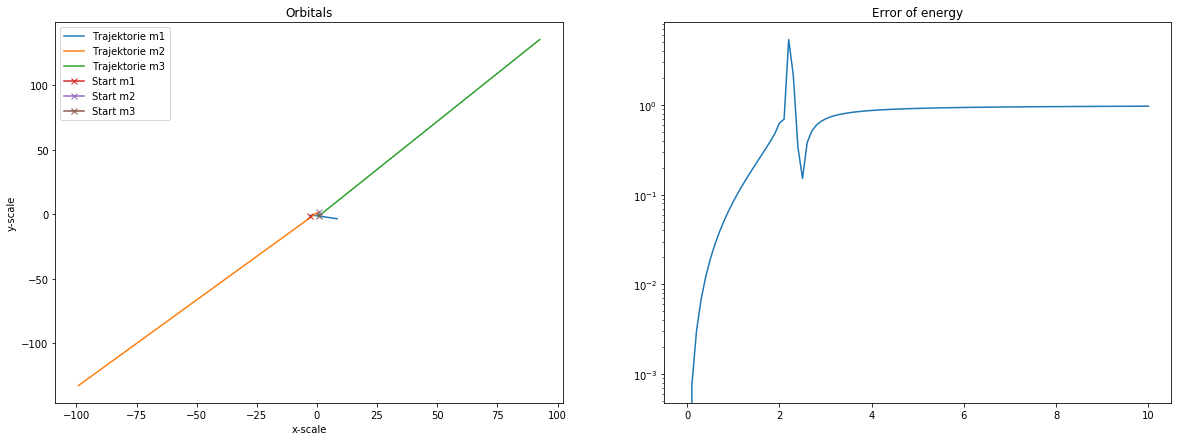

In [7]:
# Führe mit folgenden Werten analog zu oben RK4 durch und speichere die Daten in den numpy arrays rn (Variablen) 
# und tn (Zeiten) ab. 
t =0
h = 0.1
n=100  

rn,tn = rk4(r,t,abl,h,n,m)

# Berechne die Abstände zwischen den einzelnen Körpern. 
diff1=((rn[:,4]-rn[:,0])**2+(rn[:,5]-rn[:,1])**2)**0.5  #"Distance of m1 and m2"
diff2=((rn[:,8]-rn[:,0])**2+(rn[:,9]-rn[:,1])**2)**0.5  #"Distance of m1 and m3"
diff3=((rn[:,8]-rn[:,4])**2+(rn[:,9]-rn[:,5])**2)**0.5  #"Distance of m2 and m3"

# Berechne Energie aus Summe der potentiellen Energie und der Kinetischen Energie
En = -(G*m1*m2)/diff1 
- (G*m1*m3)/diff2 
- (G*m2*m3)/diff3 
+ 0.5*(m1*(rn[:,2]**2+rn[:,3]**2)
       + m2*(rn[:,6]**2+rn[:,7]**2)
       + m3*(rn[:,10]**2+rn[:,11]**2))

# Berechne reltiven Fehler der Energie im verlgiech zur Zeit 0. 
eps = np.abs(En-En[0])/np.abs(En[0])


#Plotte FLugbahnen und den Reltiven Fehler der Energie
plt.figure(figsize=(20,7))

plt.subplot(121)

plt.plot(rn[:,0],rn[:,1], label='Trajektorie m1')
plt.plot(rn[:,4],rn[:,5], label='Trajektorie m2')
plt.plot(rn[:,8],rn[:,9], label='Trajektorie m3')
plt.plot(rn[0,0],rn[0, 1], marker="x", label="Start m1")
plt.plot(rn[0,4],rn[0, 5], marker="x", label="Start m2")
plt.plot(rn[0,8],rn[0, 9], marker="x", label="Start m3")
plt.legend() 

plt.title("Orbitals")
plt.xlabel('x-scale')
plt.ylabel('y-scale')

plt.subplot(122)
plt.title('Error of energy')
plt.plot(tn,eps)
plt.yscale('log')

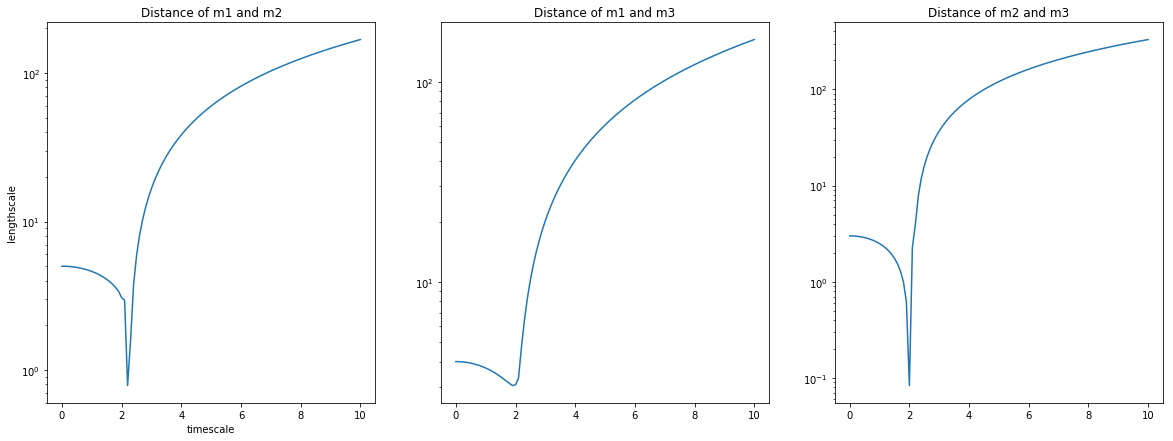

In [8]:
# Jetzt werden noch die Relativen Abstände geplottet. 
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.plot(tn,diff1)
plt.title("Distance of m1 and m2")
plt.xlabel('timescale')
plt.ylabel('lengthscale')
plt.yscale('log')

plt.subplot(132)
plt.plot(tn,diff2)
plt.title("Distance of m1 and m3")
plt.yscale('log')

plt.subplot(133)
plt.plot(tn,diff3)
plt.title("Distance of m2 and m3")
plt.yscale('log')

In [9]:
#Schreibe die Zeiten für minimalen Abstand in eine Datei
min = tn[np.where(np.r_[True, diff1[1:] < diff1[:-1]] & np.r_[diff1[:-1] < diff1[1:], True])]
min = np.append(min,tn[np.where(np.r_[True, diff2[1:] < diff2[:-1]] & np.r_[diff2[:-1] < diff2[1:], True])])
min = np.append(min,tn[np.where(np.r_[True, diff3[1:] < diff3[:-1]] & np.r_[diff3[:-1] < diff3[1:], True])])
min = np.sort(min)
savetxt('cp3data0.dat',min,delimiter=',',header='Zeiten, wo sich zwei Körper nahe kommen, bei h=0.1')

## h=0.01

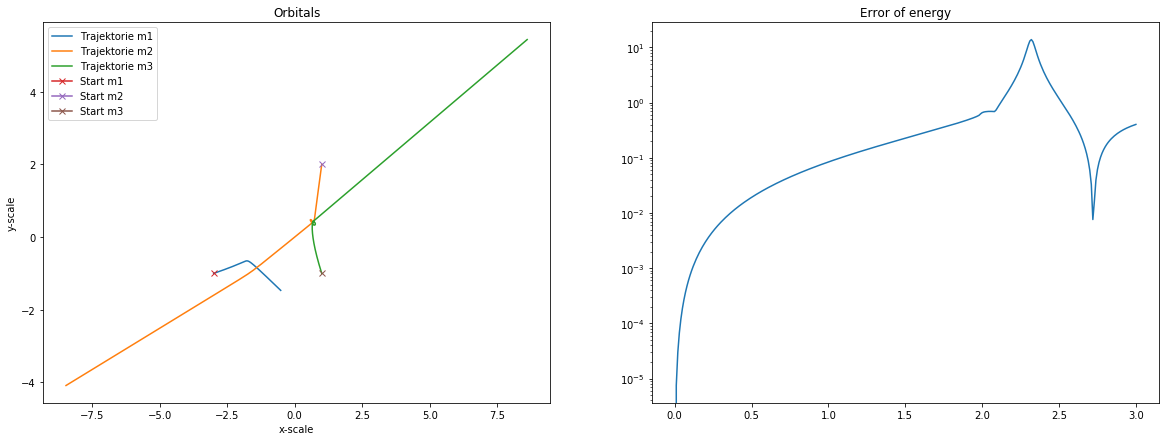

In [10]:
# Führe mit folgenden Werten analog zu oben RK4 durch und speichere die Daten in den numpy arrays rn (Variablen) 
# und tn (Zeiten) ab. 
t =0
h = 0.01
n=300  

rn,tn = rk4(r,t,abl,h,n,m)

# Berechne die Abstände zwischen den einzelnen Körpern. 
diff1=((rn[:,4]-rn[:,0])**2+(rn[:,5]-rn[:,1])**2)**0.5  #"Distance of m1 and m2"
diff2=((rn[:,8]-rn[:,0])**2+(rn[:,9]-rn[:,1])**2)**0.5  #"Distance of m1 and m3"
diff3=((rn[:,8]-rn[:,4])**2+(rn[:,9]-rn[:,5])**2)**0.5  #"Distance of m2 and m3"

# Berechne Energie aus Summe der potentiellen Energie und der Kinetischen Energie
En = -(G*m1*m2)/diff1 
- (G*m1*m3)/diff2 
- (G*m2*m3)/diff3 
+ 0.5*(m1*(rn[:,2]**2+rn[:,3]**2)
       + m2*(rn[:,6]**2+rn[:,7]**2)
       + m3*(rn[:,10]**2+rn[:,11]**2))

# Berechne relativen Fehler der Energie im verlgiech zur Zeit 0. 
eps = np.abs(En-En[0])/np.abs(En[0])


#Plotte FLugbahnen und den Reltiven Fehler der Energie
plt.figure(figsize=(20,7))

plt.subplot(121)

plt.plot(rn[:,0],rn[:,1], label='Trajektorie m1')
plt.plot(rn[:,4],rn[:,5], label='Trajektorie m2')
plt.plot(rn[:,8],rn[:,9], label='Trajektorie m3')
plt.plot(rn[0,0],rn[0, 1], marker="x", label="Start m1")
plt.plot(rn[0,4],rn[0, 5], marker="x", label="Start m2")
plt.plot(rn[0,8],rn[0, 9], marker="x", label="Start m3")
plt.legend() 

plt.title("Orbitals")
plt.xlabel('x-scale')
plt.ylabel('y-scale')

plt.subplot(122)
plt.title('Error of energy')
plt.plot(tn,eps)
plt.yscale('log')

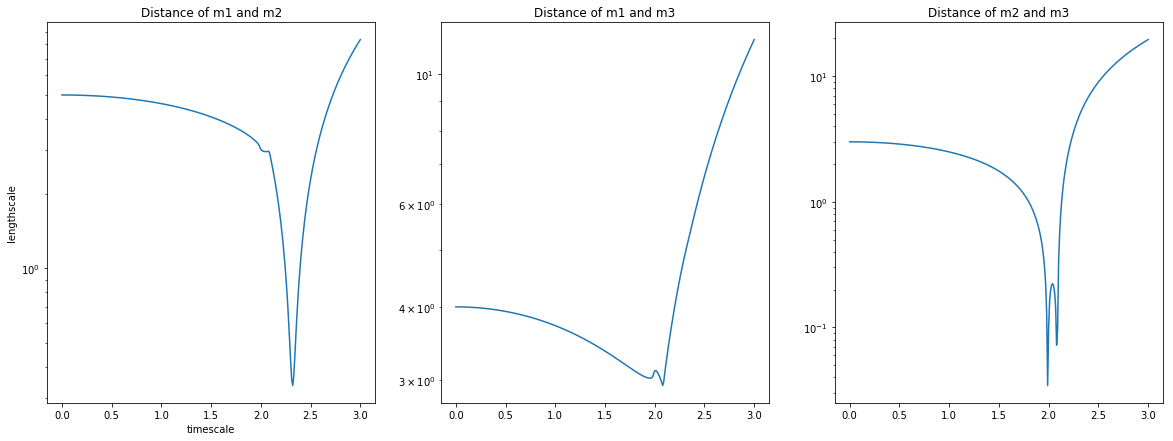

In [11]:
# Jetzt werden noch die Relativen Abstände geplottet. 
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.plot(tn,diff1)
plt.title("Distance of m1 and m2")
plt.xlabel('timescale')
plt.ylabel('lengthscale')
plt.yscale('log')

plt.subplot(132)
plt.plot(tn,diff2)
plt.title("Distance of m1 and m3")
plt.yscale('log')

plt.subplot(133)
plt.plot(tn,diff3)
plt.title("Distance of m2 and m3")
plt.yscale('log')

In [12]:
#Schreibe die Zeiten für minimalen Abstand in eine Datei
min = tn[np.where(np.r_[True, diff1[1:] < diff1[:-1]] & np.r_[diff1[:-1] < diff1[1:], True])]
min = np.append(min,tn[np.where(np.r_[True, diff2[1:] < diff2[:-1]] & np.r_[diff2[:-1] < diff2[1:], True])])
min = np.append(min,tn[np.where(np.r_[True, diff3[1:] < diff3[:-1]] & np.r_[diff3[:-1] < diff3[1:], True])])
min = np.sort(min)
savetxt('cp3data1.dat',min,delimiter=',',header='Zeiten, wo sich zwei Körper nahe kommen, bei h=0.01')

## h=0.0001

das scheint das größte h zu sein, bei dem man eindeutig die Minima unterscheiden kann, dabei wurden nicht alle 
Zeiten, bei dem die Abstände einen Tiefpunkt hatten gezählt, sondern die zeiten, bei denen man optisch ein
deutliches extremum sieht und nicht nur einen leichten Knick

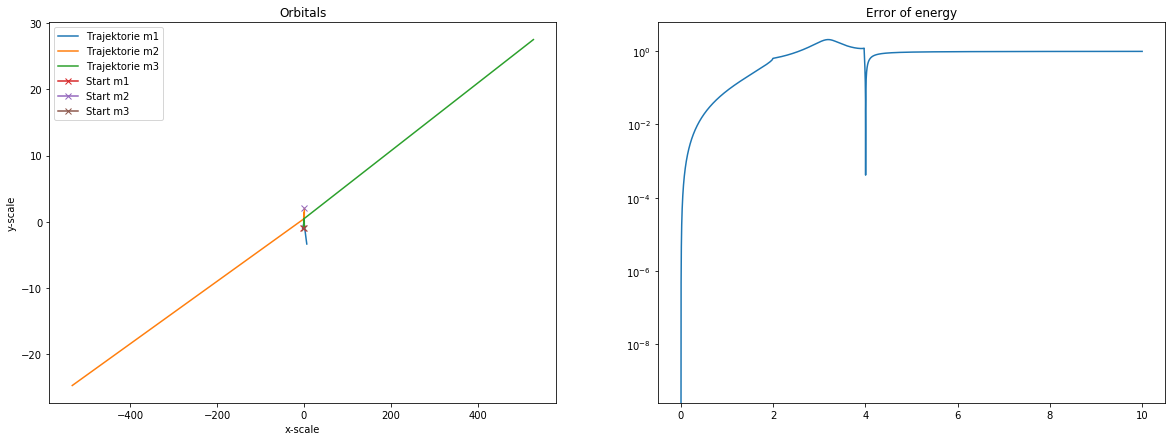

In [13]:
# Führe mit folgenden Werten analog zu oben RK4 durch und speichere die Daten in den numpy arrays rn (Variablen) 
# und tn (Zeiten) ab. 

t =0
h = 0.0001 
n=100000

rn,tn = rk4(r,t,abl,h,n,m)

# Berechne die Abstände zwischen den einzelnen Körpern. 
diff1=((rn[:,4]-rn[:,0])**2+(rn[:,5]-rn[:,1])**2)**0.5  #"Distance of m1 and m2"
diff2=((rn[:,8]-rn[:,0])**2+(rn[:,9]-rn[:,1])**2)**0.5  #"Distance of m1 and m3"
diff3=((rn[:,8]-rn[:,4])**2+(rn[:,9]-rn[:,5])**2)**0.5  #"Distance of m2 and m3"

# Berechne Energie aus Summe der potentiellen Energie und der Kinetischen Energie
En = -(G*m1*m2)/diff1 
- (G*m1*m3)/diff2 
- (G*m2*m3)/diff3 
+ 0.5*(m1*(rn[:,2]**2+rn[:,3]**2)
       + m2*(rn[:,6]**2+rn[:,7]**2)
       + m3*(rn[:,10]**2+rn[:,11]**2))

# Berechne relativen Fehler der Energie im verlgiech zur Zeit 0. 
eps = np.abs(En-En[0])/np.abs(En[0])


#Plotte FLugbahnen und den Reltiven Fehler der Energie
plt.figure(figsize=(20,7))

plt.subplot(121)

plt.plot(rn[:,0],rn[:,1], label='Trajektorie m1')
plt.plot(rn[:,4],rn[:,5], label='Trajektorie m2')
plt.plot(rn[:,8],rn[:,9], label='Trajektorie m3')
plt.plot(rn[0,0],rn[0, 1], marker="x", label="Start m1")
plt.plot(rn[0,4],rn[0, 5], marker="x", label="Start m2")
plt.plot(rn[0,8],rn[0, 9], marker="x", label="Start m3")
plt.legend() 

plt.title("Orbitals")
plt.xlabel('x-scale')
plt.ylabel('y-scale')

plt.subplot(122)
plt.title('Error of energy')
plt.plot(tn,eps)
plt.yscale('log')

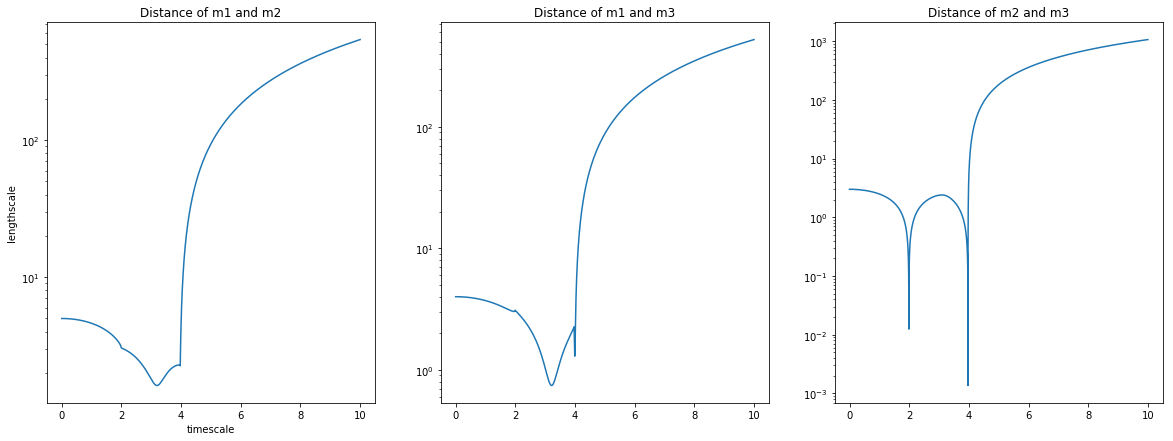

In [14]:
# Jetzt werden noch die Relativen Abstände geplottet. 
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.plot(tn,diff1)
plt.title("Distance of m1 and m2")
plt.xlabel('timescale')
plt.ylabel('lengthscale')
plt.yscale('log')

plt.subplot(132)
plt.plot(tn,diff2)
plt.title("Distance of m1 and m3")
plt.yscale('log')

plt.subplot(133)
plt.plot(tn,diff3)
plt.title("Distance of m2 and m3")
plt.yscale('log')

In [15]:
#Schreibe die Zeiten für minimalen Abstand in eine Datei
min = tn[np.where(np.r_[True, diff1[1:] < diff1[:-1]] & np.r_[diff1[:-1] < diff1[1:], True])]
min = np.append(min,tn[np.where(np.r_[True, diff2[1:] < diff2[:-1]] & np.r_[diff2[:-1] < diff2[1:], True])])
min = np.append(min,tn[np.where(np.r_[True, diff3[1:] < diff3[:-1]] & np.r_[diff3[:-1] < diff3[1:], True])])
min = np.sort(min)
savetxt('cp3data2.dat',min,delimiter=',',header='Zeiten, wo sich zwei Körper nahe kommen, bei h=0.0001')

## h=1

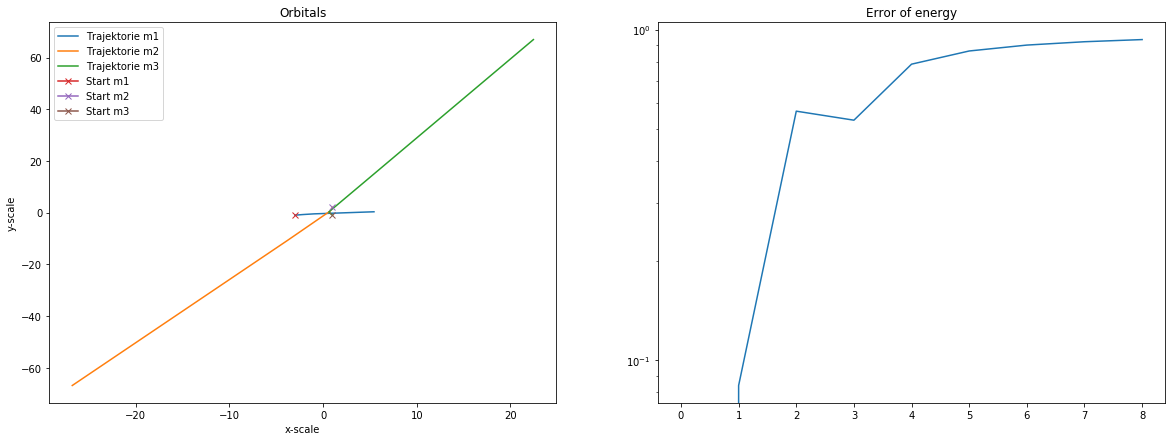

In [16]:
# Führe mit folgenden Werten analog zu oben RK4 durch und speichere die Daten in den numpy arrays rn (Variablen) 
# und tn (Zeiten) ab.
t =0
h = 1
n=8

rn,tn = rk4(r,t,abl,h,n,m)


# Berechne die Abstände zwischen den einzelnen Körpern. 
diff1=((rn[:,4]-rn[:,0])**2+(rn[:,5]-rn[:,1])**2)**0.5  #"Distance of m1 and m2"
diff2=((rn[:,8]-rn[:,0])**2+(rn[:,9]-rn[:,1])**2)**0.5  #"Distance of m1 and m3"
diff3=((rn[:,8]-rn[:,4])**2+(rn[:,9]-rn[:,5])**2)**0.5  #"Distance of m2 and m3"

# Berechne Energie aus Summe der potentiellen Energie und der Kinetischen Energie
En = -(G*m1*m2)/diff1 
- (G*m1*m3)/diff2 
- (G*m2*m3)/diff3 
+ 0.5*(m1*(rn[:,2]**2+rn[:,3]**2)
       + m2*(rn[:,6]**2+rn[:,7]**2)
       + m3*(rn[:,10]**2+rn[:,11]**2))

# Berechne relativen Fehler der Energie im verlgiech zur Zeit 0. 
eps = np.abs(En-En[0])/np.abs(En[0])


#Plotte FLugbahnen und den Reltiven Fehler der Energie
plt.figure(figsize=(20,7))

plt.subplot(121)

plt.plot(rn[:,0],rn[:,1], label='Trajektorie m1')
plt.plot(rn[:,4],rn[:,5], label='Trajektorie m2')
plt.plot(rn[:,8],rn[:,9], label='Trajektorie m3')
plt.plot(rn[0,0],rn[0, 1], marker="x", label="Start m1")
plt.plot(rn[0,4],rn[0, 5], marker="x", label="Start m2")
plt.plot(rn[0,8],rn[0, 9], marker="x", label="Start m3")
plt.legend() 

plt.title("Orbitals")
plt.xlabel('x-scale')
plt.ylabel('y-scale')

plt.subplot(122)
plt.title('Error of energy')
plt.plot(tn,eps)
plt.yscale('log')


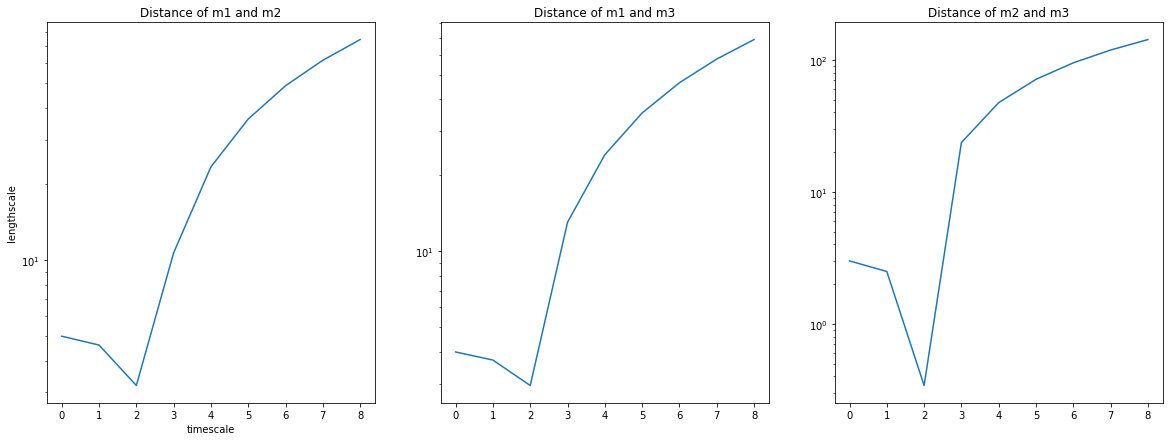

In [17]:
# Jetzt werden noch die Relativen Abstände geplottet. 
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.plot(tn,diff1)
plt.title("Distance of m1 and m2")
plt.xlabel('timescale')
plt.ylabel('lengthscale')
plt.yscale('log')

plt.subplot(132)
plt.plot(tn,diff2)
plt.title("Distance of m1 and m3")
plt.yscale('log')

plt.subplot(133)
plt.plot(tn,diff3)
plt.title("Distance of m2 and m3")
plt.yscale('log')

In [18]:
#Schreibe die Zeiten für minimalen Abstand in eine Datei
min = tn[np.where(np.r_[True, diff1[1:] < diff1[:-1]] & np.r_[diff1[:-1] < diff1[1:], True])]
min = np.append(min,tn[np.where(np.r_[True, diff2[1:] < diff2[:-1]] & np.r_[diff2[:-1] < diff2[1:], True])])
min = np.append(min,tn[np.where(np.r_[True, diff3[1:] < diff3[:-1]] & np.r_[diff3[:-1] < diff3[1:], True])])
min = np.sort(min)
savetxt('cp3data3.dat',min,delimiter=',',header='Zeiten, wo sich zwei Körper nahe kommen, bei h=1')